# Creating DEM backdrop

We have all the variables, but to show their relation to elevation, we need to overlay them on to a DEM. This will be a contour map. To start, let's define the libraries we'll need:

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

open the NC file as a dataset through x-array. and extract the elevation data from the dataset:

In [2]:
ds = xr.open_dataset("../../../topo.nc")
#ds

In [3]:
dem = ds.dem

### What data are we trying to overlay?

DEM spatial plot

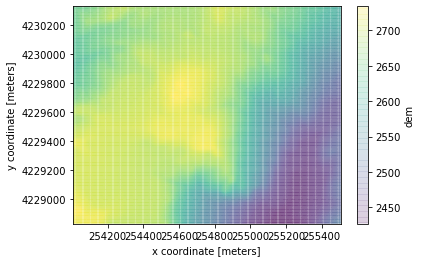

In [4]:
dem.isel(x=slice(0, 500), y=slice(0,500)).plot(alpha=0.1)

In [5]:
# multiple file open snowdepth
# combine with DEM??
# use snowdepth time series to interpolate years 2015 and 2017
# generate and plot contour map of DEM
# plot 2015 and 2017 data in separate subplots (and/or subtract to find anomaly difference), overlaying contour map 

DEM contour

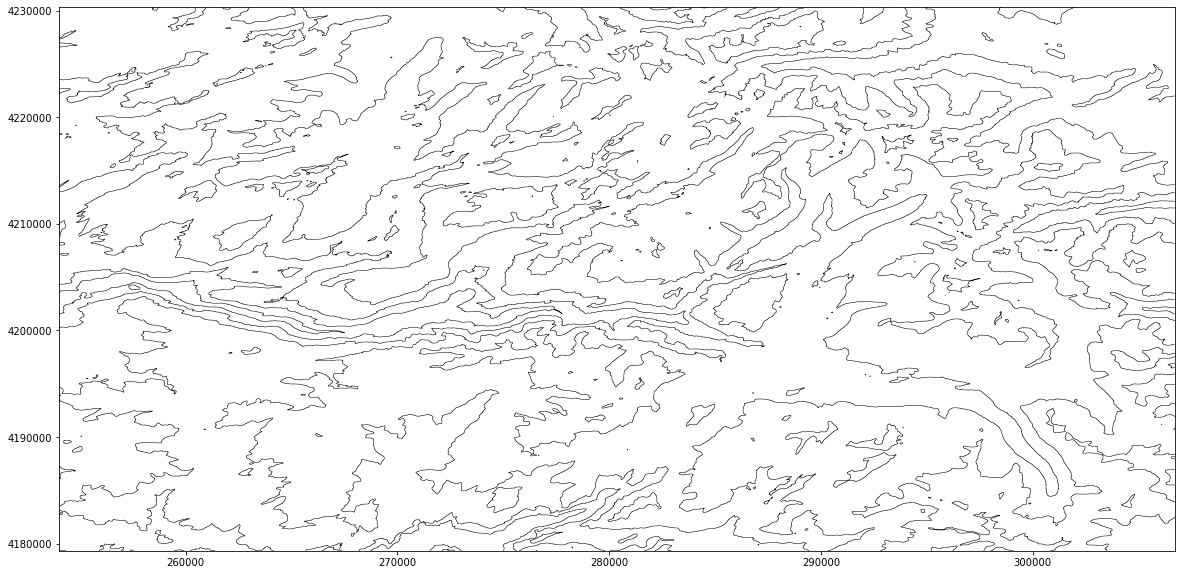

In [6]:
plt.figure(figsize=(20,10))
levels = np.arange(0, 4000, 400)

contours = plt.contour(dem.x, dem.y, dem, levels=levels, colors='k', linewidths=0.5)

#plt.clabel(contours, fmt='%1.0f')

### Example Result

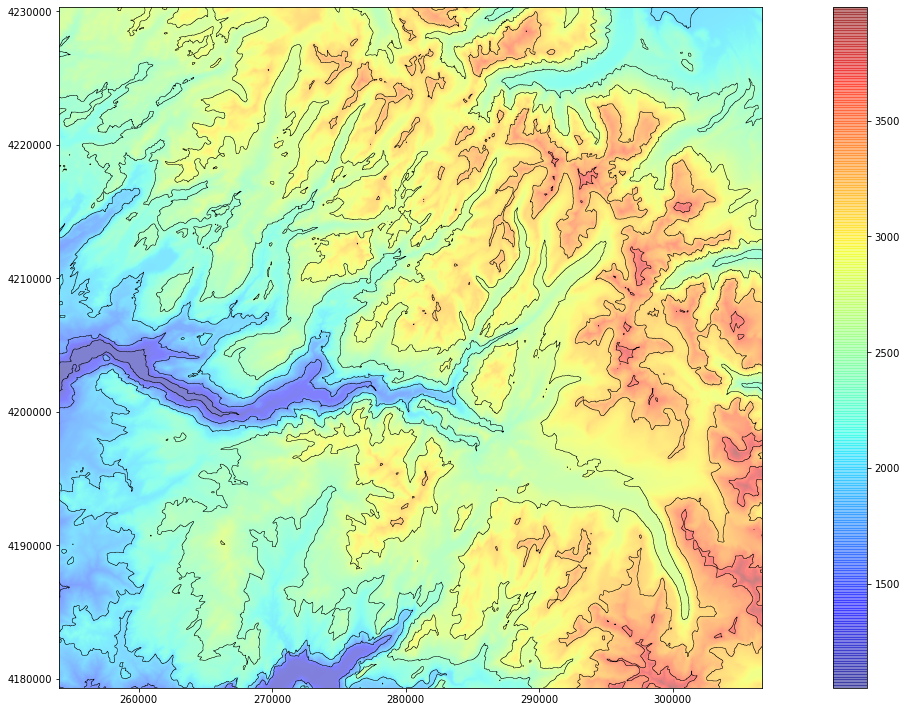

In [5]:
# superimposing two data layers
plt.figure(figsize=(20,10))

#x = dem.x.isel(x=slice(10000,17000))
#y = dem.y.isel(y=slice(10000,17000))
#z = dem.isel(x=slice(10000,17000), y=slice(10000,17000))

contours = plt.contour(dem.x, dem.y, dem, colors='k', levels=levels, linewidths=0.5)
plt.imshow(dem, extent=[np.min(dem.x), np.max(dem.x), np.min(dem.y), np.max(dem.y)], alpha=0.5, cmap='jet')

plt.colorbar()
plt.tight_layout()
#plt.savefig('./figures/dem_contour_100.png')
#plt.clabel(contours, fmt='%1.0f')

In [13]:
path = '/srv/shared/deep_stac/data/forcings/2017/tmmx_2017.nc'
forcings = xr.open_dataset(path)

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)


In [14]:
forcings

<xarray.Dataset>
Dimensions:          (crs: 1, day: 365, lat: 585, lon: 1386)
Coordinates:
  * lon              (lon) float64 -124.8 -124.7 -124.7 ... -67.14 -67.1 -67.06
  * lat              (lat) float64 49.4 49.36 49.32 49.28 ... 25.15 25.11 25.07
  * day              (day) datetime64[ns] 2017-01-01 2017-01-02 ... 2017-12-31
  * crs              (crs) uint16 3
Data variables:
    air_temperature  (day, lat, lon) float32 ...
Attributes:
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    geospatial_lon_max:         -67.058333300000015
    geospatial_lon_resolution:  0.041666666666666
    geospatial_lat_resolution:  0.041666666666666
    geospatial_lat_units:       decimal_degrees north
    geospatial_lon_units:       decim

In [15]:
forcings.air_temperature

<xarray.DataArray 'air_temperature' (day: 365, lat: 585, lon: 1386)>
[295945650 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -124.8 -124.7 -124.7 -124.6 ... -67.14 -67.1 -67.06
  * lat      (lat) float64 49.4 49.36 49.32 49.28 ... 25.19 25.15 25.11 25.07
  * day      (day) datetime64[ns] 2017-01-01 2017-01-02 ... 2017-12-31
Attributes:
    units:              K
    description:        Daily Maximum Temperature
    long_name:          tmmx
    standard_name:      tmmx
    dimensions:         lon lat time
    grid_mapping:       crs
    coordinate_system:  WGS84,EPSG:4326

In [16]:
jan_one = forcings.air_temperature.isel(day=200)
#jan_one

In [ ]:
print(np.min(dem.x), np.max(dem.x), '\n', np.min(dem.y), np.max(dem.y))

In [15]:
jan_one.lon.values

array([-124.76666663, -124.72499997, -124.6833333 , ...,  -67.14166663,
        -67.09999997,  -67.0583333 ])

In [17]:
jan_one_extent = jan_one.sel(lat=slice(38,37), lon=slice(-120,-119))
#jan_one_extent

In [23]:
len(dem.y.values)

17002

In [24]:
import pyproj
x = dem.x.values
y = dem.y.values
lon_grid, lat_grid = np.meshgrid(x, y)
inProj = pyproj.Proj(init='epsg:32611')
outProj = pyproj.Proj(init='epsg:4326')

xx, yy = pyproj.transform(inProj,outProj, x, y)

RuntimeError: x,y and z must be same size

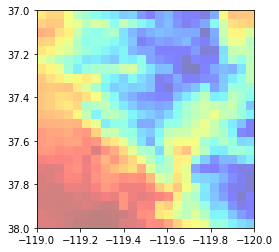

In [9]:
# superimposing two data layers
ax = plt.subplot()

latlon = [-119, -120, 38, 37]

contours = ax.contour(dem.x, dem.y, dem, colors='k', levels=levels, linewidths=0.5)
ax.imshow(jan_one_extent, extent=[latlon[0], latlon[1], latlon[2], latlon[3]], alpha=0.5, cmap='jet')